In [1]:
import pandas as pd

In [19]:
def compute_best_so_far(df):
    
    best = df['loss_estimate'][0]
    best_ = []
    for _ in df['loss_estimate']:
        best = min(best,_)
        best_.append(best)
        
    return best_

dfs = []
for _ in ['baxus','saasbo','turbo_ei','turbo_ts','vanilla_bo']:
    df_ = pd.read_csv(f'./data/{_}.csv')
    df_['strategy'] = _
    df_['loss_estimate_cum_min'] = compute_best_so_far(df_)
    dfs.append(df_)

df = pd.concat(dfs)

In [21]:
from plotnine import *

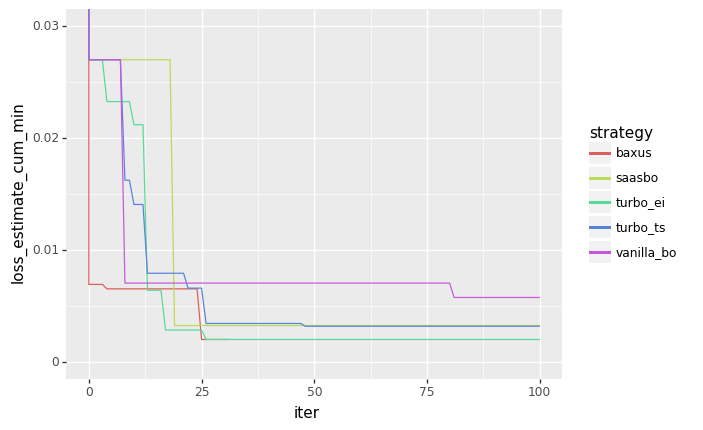

<ggplot: (8782749361122)>

In [25]:
(
    ggplot(df) + 
    geom_line(aes(x = "iter", y = "loss_estimate_cum_min", colour = "strategy")) + 
    coord_cartesian(ylim = (0,0.03))
)

In [40]:
# best point under each method
df.groupby('strategy')\
    .apply(lambda x: x.iloc[x['loss_estimate'].argmin()])\
    .reset_index(drop = 1)\
    .sort_values(by = ['loss_estimate_cum_min'])

,x1,x2,x3,x4,loss_estimate,iter,strategy,loss_estimate_cum_min
0,527.814025,823.478848,851.986618,527.814025,0.002031,25,baxus,0.002031
2,714.869428,637.904750,877.984608,740.905558,0.002031,26,turbo_ei,0.002031
3,782.793746,699.486693,883.659921,734.637866,0.003211,48,turbo_ts,0.003211
1,400.000000,1000.000000,824.587710,400.000000,0.003275,19,saasbo,0.003275
4,911.558207,569.716499,908.816942,933.124801,0.005780,81,vanilla_bo,0.005780
